In [50]:
import os, importlib, sys, time

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [53]:
import freqepid

In [54]:
# save_dir = "result_ebcr"
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# 0. parameters

In [55]:
GPi = np.load('data/GPi.npz')

In [56]:
param = pd.read_feather('data/param_ebcr_2.feather')
thetas = param.iloc[:,-3:].to_numpy()

In [57]:
regions = param.region.to_numpy()
num_region = len(regions)
d = thetas.shape[-1]-1

In [58]:
betas = thetas[:,-2:]

(array([ 7., 19., 16.,  4.,  1.,  0.,  6., 21., 17.,  9.]),
 array([-2.85720973, -2.68563452, -2.51405932, -2.34248412, -2.17090891,
        -1.99933371, -1.82775851, -1.6561833 , -1.4846081 , -1.3130329 ,
        -1.14145769]),
 <BarContainer object of 10 artists>)

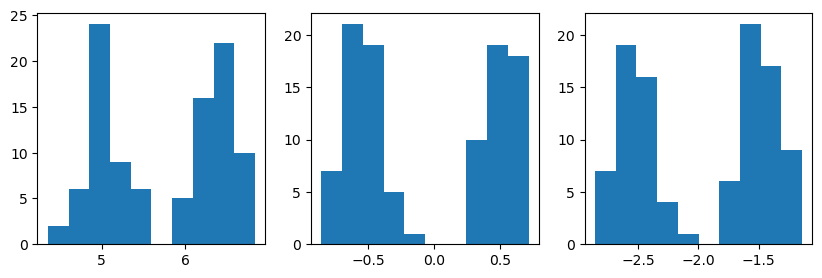

In [59]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.hist(thetas[:,0])
plt.subplot(1,3,2); plt.hist(thetas[:,1])
plt.subplot(1,3,3); plt.hist(thetas[:,2])

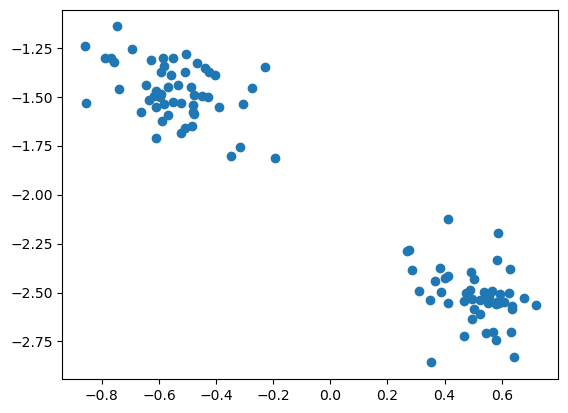

In [60]:
plt.scatter(thetas[:,1], thetas[:,2])

# 1. data

In [61]:
data = pd.read_feather('data/simulation_ebcr_2.feather')

In [62]:
data

region  date        R            EI     infection          EY  death  \
0        aa     0  3.83775    614.461723    614.461723    1.530772      1   
1        aa     1  3.83775    646.418102    646.418102    1.541138      2   
2        aa     2  3.83775    764.782524    764.782524    1.550349      1   
3        aa     3  3.83775    958.980489    958.980489    1.559102      1   
4        aa     4  3.83775   1220.648612   1220.648612    1.569473      3   
...     ...   ...      ...           ...           ...         ...    ...   
5926     dv    57  0.88899  23847.672976  23847.672976  341.600895    134   
5927     dv    58  0.88899  23457.591709  23457.591709  337.524570    400   
5928     dv    59  0.88899  23073.891081  23073.891081  333.310910    178   
5929     dv    60  0.88899  22696.466723  22696.466723  328.921328    222   
5930     dv    61  0.88899  22325.215972  22325.215972  324.449061    353   

      intervention  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
5926             1  
5927             1  
5928             1  
5929             1  
5930             1  

[5931 rows x 8 columns]

# 2. fit

In [63]:
model = freqepid.Model(GPi['g'], GPi['pi'], T0=40, family='nbinom')

In [64]:
ns_mle = np.zeros(num_region)
ms_mle = np.zeros(num_region)
bs_mle = np.zeros((num_region,d))
Vs_mle = np.zeros((num_region,d+2,d+2))

In [65]:
for i_region, r in enumerate(regions):
    start_sim = time.time()
    
    data_i = data[data['region']==r]
    T = len(data_i)
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    # fit
    nmle, mmle, bmle, ll =\
    model.fit(A, Y, n_iter=200, step_size=1,
              history=False, verbose=False)
    
    ns_mle[i_region] = nmle
    ms_mle[i_region] = mmle
    bs_mle[i_region,:] = bmle

#     nmle = ns_mle[i_region]
#     mmle = ms_mle[i_region]
#     bmle = bs_mle[i_region,:]
    
    Ihat_dth, Ihat_hac, Ihat_sdw =\
    model.inference(A, Y, nmle, mmle, bmle)
    
    Vs_mle[i_region] = la.pinv(Ihat_dth)
    
    sys.__stdout__.write("%d-th region finished, %f sec.\n"
                         %(i_region+1, time.time()-start_sim))
    sys.__stdout__.flush()

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]
/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:146: RuntimeWarning: divide by zero encountered in log
  log_err_ratio = np.log(Y / self.predict_EY(A, 0, binit))


1-th region finished, 1.085589 sec.
2-th region finished, 1.136877 sec.
3-th region finished, 1.237376 sec.
4-th region finished, 1.141838 sec.
5-th region finished, 1.089943 sec.
6-th region finished, 1.274694 sec.
7-th region finished, 1.040606 sec.
8-th region finished, 1.418070 sec.
9-th region finished, 1.248474 sec.
10-th region finished, 1.180116 sec.
11-th region finished, 1.142540 sec.
12-th region finished, 1.307355 sec.
13-th region finished, 1.146765 sec.
14-th region finished, 0.989313 sec.
15-th region finished, 1.203803 sec.
16-th region finished, 1.121578 sec.
17-th region finished, 1.061737 sec.
18-th region finished, 1.354976 sec.
19-th region finished, 1.336262 sec.
20-th region finished, 1.172510 sec.
21-th region finished, 1.228885 sec.
22-th region finished, 1.358270 sec.
23-th region finished, 1.195266 sec.
24-th region finished, 1.234227 sec.
25-th region finished, 1.220223 sec.
26-th region finished, 1.264861 sec.
27-th region finished, 1.258150 sec.
28-th regi

In [66]:
np.savez('result_freqepi_ebcr_2.npz',
         ns_mle = ns_mle, ms_mle = ms_mle, 
         bs_mle = bs_mle, Vs_mle = Vs_mle)

## plot

In [67]:
# locals().update(np.load('simulation_freqepi_ebcr1.npz'))

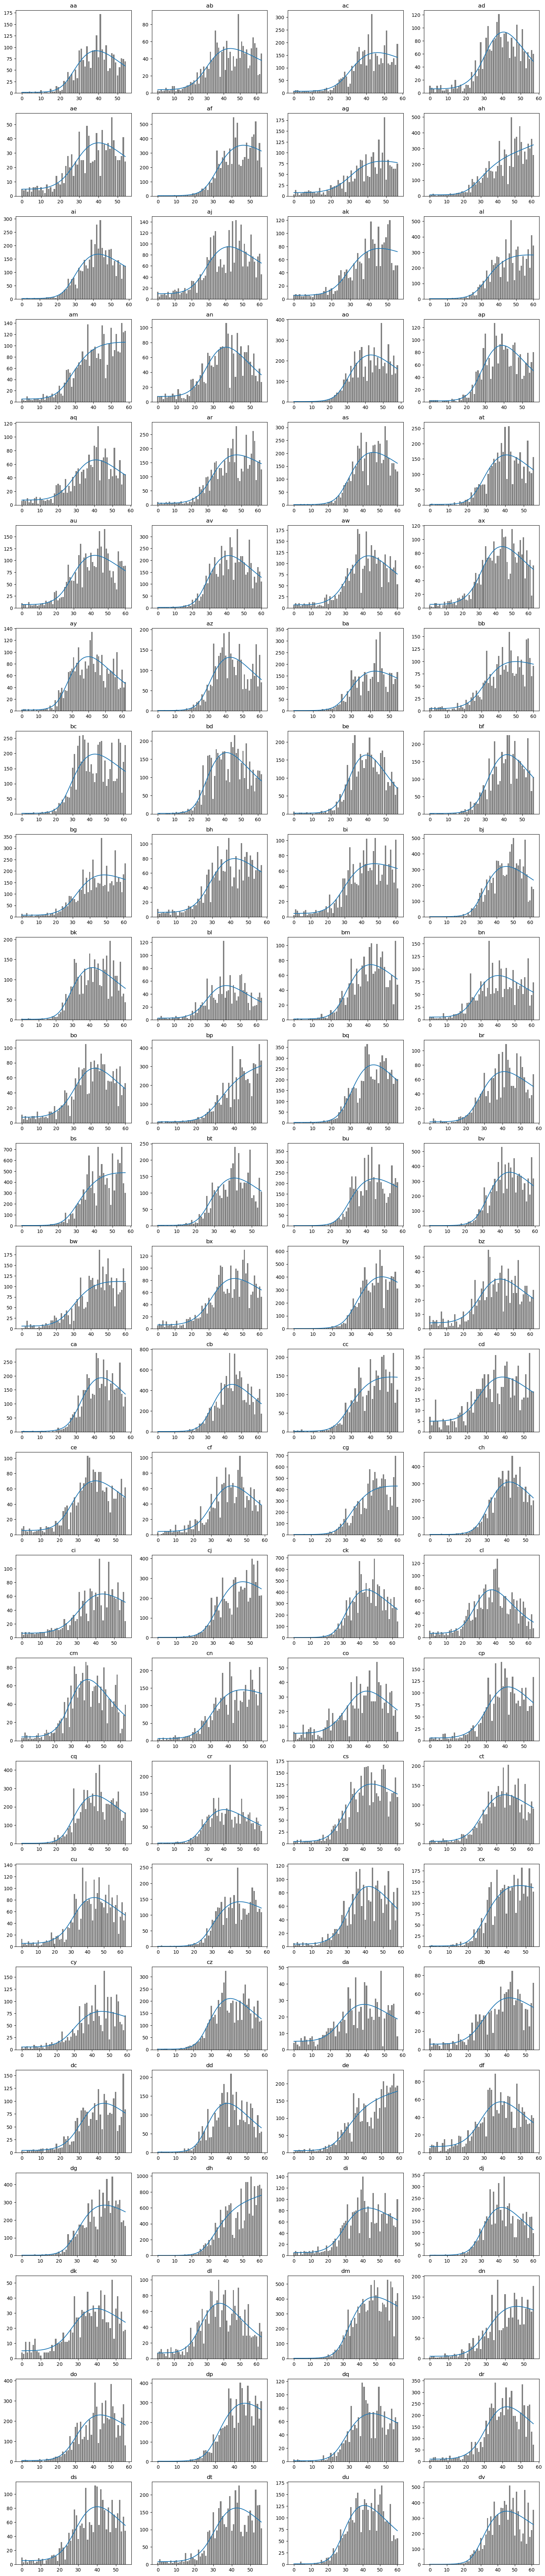

In [68]:
plt.figure(figsize=(16, int(num_region/4+1)*3))

for i, r in enumerate(regions):
    plt.subplot(int(num_region/4+1),4,i+1)
    
    Y = np.array(data[data.region == r].death)
    T = Y.shape[0]
    
    A = np.zeros([T, d])
    A[:,0] = np.full(T, 1)
    A[:,1:] = np.array(data[data.region == r].intervention)[:,None]

    plt.bar(np.arange(T), Y, color='grey')
    plt.plot(model.predict_EY(A, ms_mle[i], bs_mle[i]))
    plt.title('%s'%r)
    
plt.tight_layout()

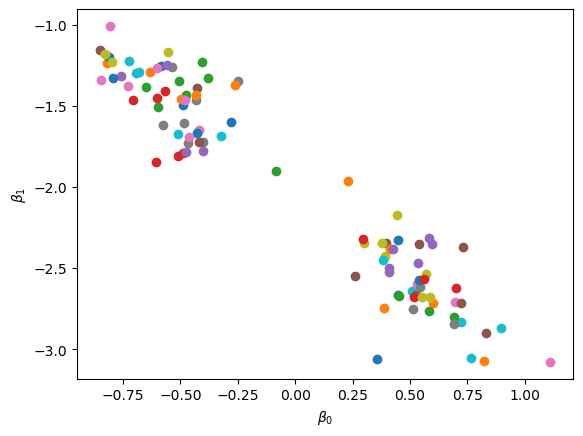

In [69]:
for i_region, (beta, bmle, Vmle) \
in enumerate(zip(betas, bs_mle, Vs_mle)):
    p = plt.scatter(*bmle, label="%d"%i_region)
#     plt.arrow(*beta, *(bmle-beta), width=0.01, 
#               length_includes_head=True,
#               color=p.get_facecolor(), alpha=1)
#     freqepid.confidence_ellipse(
#         bmle, Vmle[2:,2:], n_std=np.sqrt(stats.chi2(2).ppf(0.95)),
#         facecolor=p.get_facecolor(), alpha=0.3)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); # plt.legend()

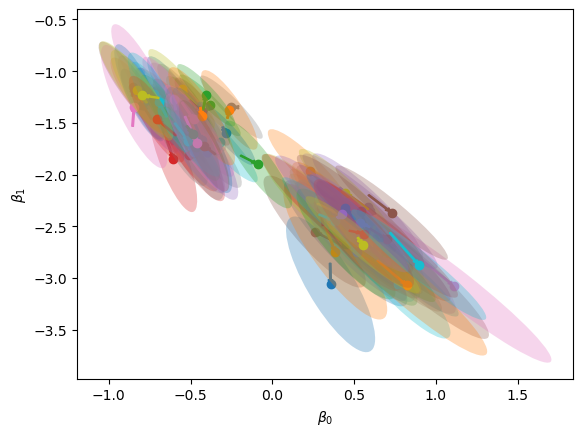

In [70]:
for i_region, (beta, bmle, Vmle) \
in enumerate(zip(betas, bs_mle, Vs_mle)):
    p = plt.scatter(*bmle, label="%d"%i_region)
    plt.arrow(*beta, *(bmle-beta), width=0.01, 
              length_includes_head=True,
              color=p.get_facecolor(), alpha=1)
    freqepid.confidence_ellipse(
        bmle, Vmle[2:,2:], n_std=np.sqrt(stats.chi2(2).ppf(0.95)),
        facecolor=p.get_facecolor(), alpha=0.3)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); # plt.legend()

In [71]:
X2_mle = ((bs_mle - betas)[:,None,:] @ np.linalg.pinv(Vs_mle[:,2:,2:]) @ (bs_mle - betas)[:,:,None])[:,0,0]

In [72]:
np.mean(X2_mle < stats.chi2(2).ppf(0.95))

0.95

# 3. EBCR

In [73]:
thats = np.concatenate([ms_mle[:,None], bs_mle], -1)
covs = Vs_mle[:,1:,1:]

In [74]:
result_ebcr = freqepid.EBCR(thats, covs, num_mc=1000, weights=np.full(100, 1))

In [75]:
ths_eb = result_ebcr.ths_eb

In [76]:
covs_eb = result_ebcr.covs_eb

In [77]:
chi_pa = result_ebcr.chi_pa(0.05)

## plots

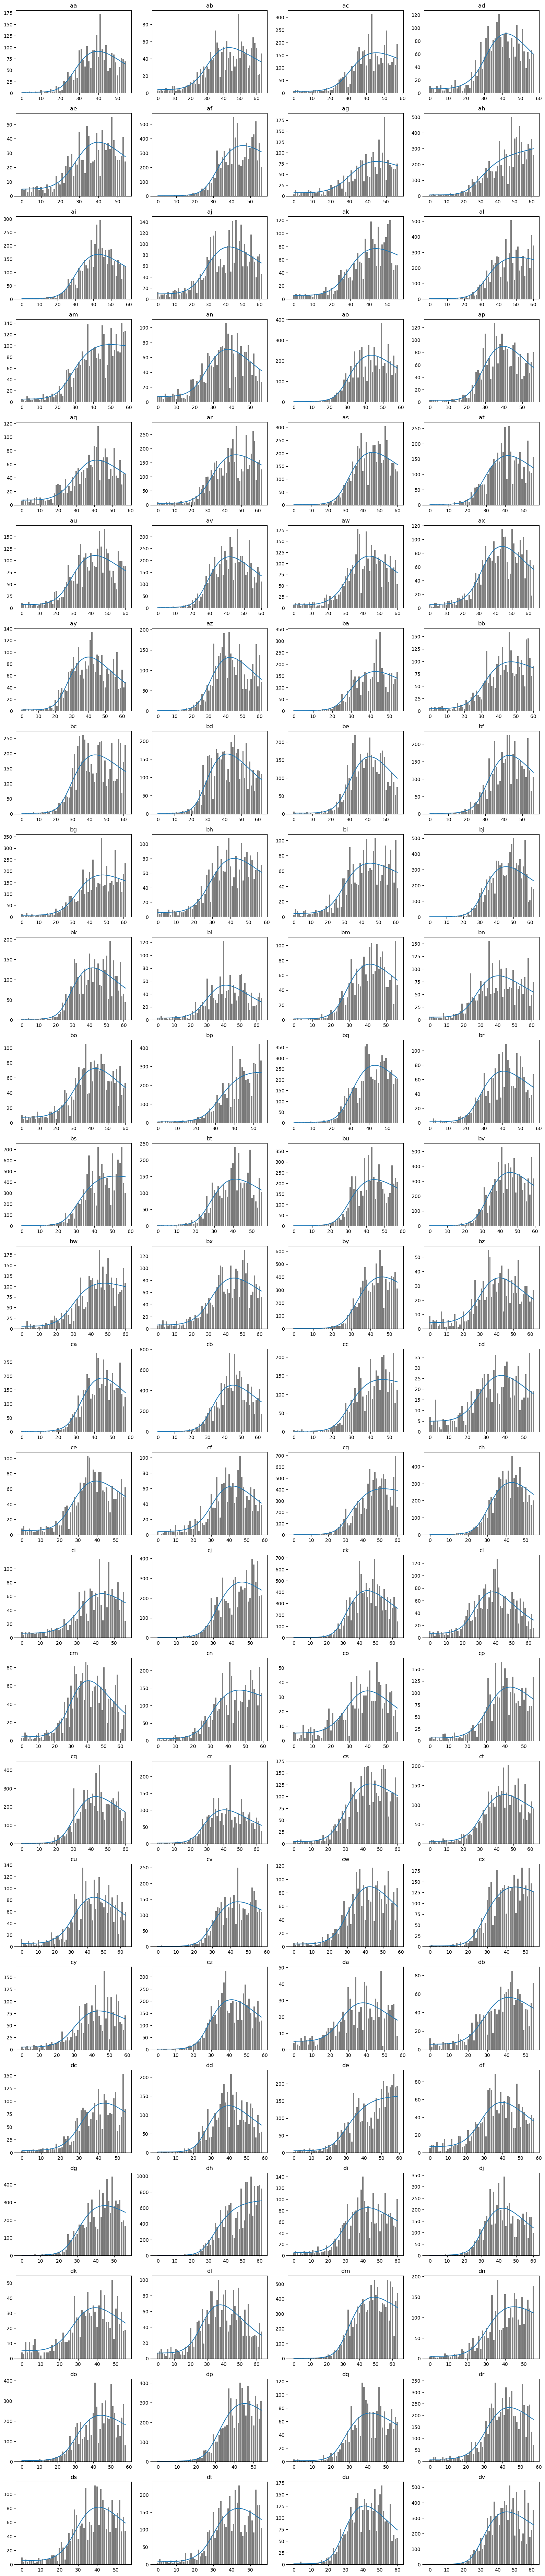

In [78]:
plt.figure(figsize=(16, int(num_region/4+1)*3))

for i, r in enumerate(regions):
    plt.subplot(int(num_region/4+1),4,i+1)
    
    Y = np.array(data[data.region == r].death)
    T = Y.shape[0]
    
    A = np.zeros([T, d])
    A[:,0] = np.full(T, 1)
    A[:,1:] = np.array(data[data.region == r].intervention)[:,None]

    plt.bar(np.arange(T), Y, color='grey')
    plt.plot(model.predict_EY(A, ths_eb[i,0], ths_eb[i,1:]))
    plt.title('%s'%r)
    
plt.tight_layout()

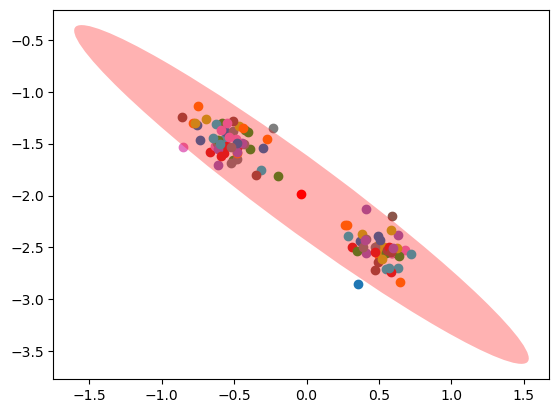

In [79]:
for i_region, beta in enumerate(betas):
    p = plt.scatter(*beta)
    
p = plt.scatter(*result_ebcr.th_o[1:], color='red')
freqepid.confidence_ellipse(
    result_ebcr.th_o[1:], result_ebcr.Phi2[1:,1:], n_std = chi_pa,
    facecolor=p.get_facecolor(), alpha=0.3)

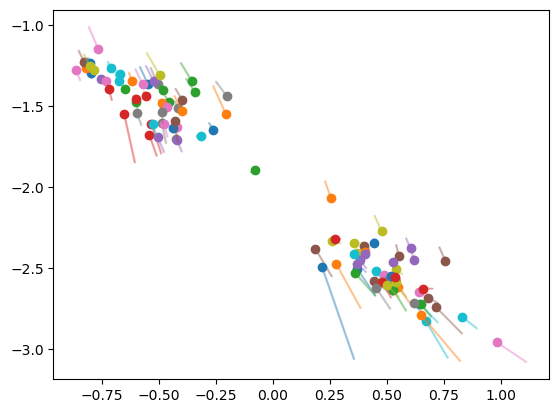

In [80]:
for i, r in enumerate(regions):
    p = plt.scatter(*ths_eb[i,1:])
    plt.arrow(*thats[i,1:], *(ths_eb[i,1:]-thats[i,1:]), width=0.005, 
             length_includes_head=True,
             color=p.get_facecolor(), alpha=0.3)

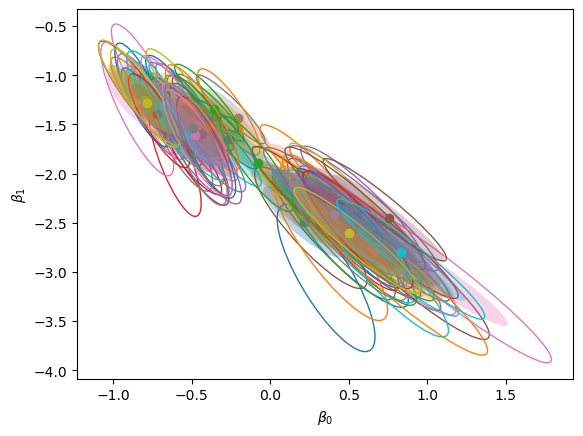

In [81]:
for i, r in enumerate(regions):
    p = plt.scatter(ths_eb[i,1], ths_eb[i,2])
    freqepid.confidence_ellipse(
        ths_eb[i,1:], covs_eb[i,1:,1:], n_std = chi_pa,
        facecolor=p.get_facecolor(), alpha=0.3)
    freqepid.confidence_ellipse(
        thats[i,1:], covs[i,1:,1:], n_std = chi_pa,
        edgecolor=p.get_facecolor(), facecolor='none', alpha=1)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); #plt.legend(loc=(1.02,0))

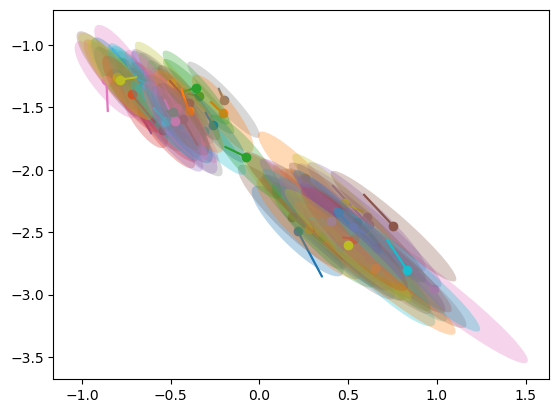

In [82]:
for i_region, (beta, th_eb, cov_eb) in enumerate(zip(betas, ths_eb, covs_eb)):
    p = plt.scatter(*(th_eb[1:]))
    plt.arrow(*beta, *(th_eb[1:]-beta), width=0.005, 
              length_includes_head=True,
              color=p.get_facecolor(), alpha=1)
    freqepid.confidence_ellipse(
        th_eb[1:], cov_eb[1:,1:], n_std = chi_pa,
        facecolor=p.get_facecolor(), alpha=0.3)

In [83]:
X2_eb = ((ths_eb[:,1:] - betas)[:,None,:] @ np.linalg.pinv(covs_eb[:,1:,1:]) @ (ths_eb[:,1:] - betas)[:,:,None])[:,0,0]

In [84]:
np.mean(X2_eb < result_ebcr.chi_pa(0.05)**2)

0.91

## robust CR

In [85]:
rho_pa = np.zeros(num_region)
rho_l = np.zeros(num_region)

In [86]:
for i, r in enumerate(regions):
    start_iter = time.time()
    
    rho_pa[i] = result_ebcr.cv.rho(chi_pa, result_ebcr.m2s[i],
                                   result_ebcr.m4s[i]+1e-2)['alpha']
    
    rho_l[i] = result_ebcr.cv.rho_l(chi_pa, result_ebcr.m2s[i],
                                    result_ebcr.m4s[i])['alpha']
    
    print("region %d finished, lapse: %.2f sec."
          %(i, time.time()-start_iter))

region 0 finished, lapse: 0.49 sec.
region 1 finished, lapse: 0.30 sec.
region 2 finished, lapse: 0.47 sec.
region 3 finished, lapse: 0.44 sec.
region 4 finished, lapse: 0.43 sec.
region 5 finished, lapse: 0.30 sec.
region 6 finished, lapse: 0.44 sec.
region 7 finished, lapse: 0.29 sec.
region 8 finished, lapse: 0.30 sec.
region 9 finished, lapse: 0.30 sec.
region 10 finished, lapse: 0.47 sec.
region 11 finished, lapse: 0.30 sec.
region 12 finished, lapse: 0.30 sec.
region 13 finished, lapse: 0.46 sec.
region 14 finished, lapse: 0.30 sec.
region 15 finished, lapse: 0.48 sec.
region 16 finished, lapse: 0.46 sec.
region 17 finished, lapse: 0.30 sec.
region 18 finished, lapse: 0.30 sec.
region 19 finished, lapse: 0.45 sec.
region 20 finished, lapse: 0.30 sec.
region 21 finished, lapse: 0.30 sec.
region 22 finished, lapse: 0.49 sec.
region 23 finished, lapse: 0.30 sec.
region 24 finished, lapse: 0.30 sec.
region 25 finished, lapse: 0.31 sec.
region 26 finished, lapse: 0.45 sec.
region 27 f

In [87]:
rho_l

array([0.12767256, 0.07227541, 0.09699349, 0.16548154, 0.12455802,
       0.09438124, 0.12551185, 0.06724925, 0.08271619, 0.07713421,
       0.09665852, 0.08201776, 0.06605676, 0.11834769, 0.08601411,
       0.11987589, 0.10912189, 0.07621755, 0.07738086, 0.12354852,
       0.076353  , 0.07712677, 0.09543969, 0.07396431, 0.07220586,
       0.09394052, 0.12125496, 0.07970376, 0.08183765, 0.08378823,
       0.20225736, 0.17676643, 0.07538579, 0.08094964, 0.07551007,
       0.08701691, 0.08342909, 0.09298133, 0.10346787, 0.08048385,
       0.09200488, 0.09469196, 0.10339345, 0.09172365, 0.09824637,
       0.12056798, 0.10876621, 0.09503202, 0.08553999, 0.07981937,
       0.12008847, 0.08972697, 0.12061421, 0.09212416, 0.09079287,
       0.1036445 , 0.08665814, 0.1392021 , 0.07987546, 0.10872522,
       0.13296476, 0.10719563, 0.07793909, 0.08336071, 0.09577417,
       0.07725317, 0.18620182, 0.15905729, 0.08578182, 0.07178421,
       0.07023958, 0.06664899, 0.08795775, 0.08709547, 0.12226

In [88]:
chi_eb = np.zeros(num_region)

In [89]:
for i, r in enumerate(regions):
    start_iter = time.time()
    
    chi_eb[i] = result_ebcr.chi_eb(i, 0.05, linear=True)
    
    print("region %d finished, lapse: %.2f sec."
          %(i, time.time()-start_iter))

region 0 finished, lapse: 2.95 sec.
region 1 finished, lapse: 3.39 sec.
region 2 finished, lapse: 3.17 sec.
region 3 finished, lapse: 3.03 sec.
region 4 finished, lapse: 2.95 sec.
region 5 finished, lapse: 3.41 sec.
region 6 finished, lapse: 3.00 sec.
region 7 finished, lapse: 3.37 sec.
region 8 finished, lapse: 3.23 sec.
region 9 finished, lapse: 3.89 sec.
region 10 finished, lapse: 3.19 sec.
region 11 finished, lapse: 2.93 sec.
region 12 finished, lapse: 3.36 sec.
region 13 finished, lapse: 2.94 sec.
region 14 finished, lapse: 3.26 sec.
region 15 finished, lapse: 2.94 sec.
region 16 finished, lapse: 2.95 sec.
region 17 finished, lapse: 3.38 sec.
region 18 finished, lapse: 4.08 sec.
region 19 finished, lapse: 3.04 sec.
region 20 finished, lapse: 3.38 sec.
region 21 finished, lapse: 3.43 sec.
region 22 finished, lapse: 3.16 sec.
region 23 finished, lapse: 3.17 sec.
region 24 finished, lapse: 3.35 sec.
region 25 finished, lapse: 2.93 sec.
region 26 finished, lapse: 2.96 sec.
region 27 f

In [90]:
chi_eb

array([3.32799305, 2.96066056, 3.12887685, 3.63985704, 3.32452784,
       3.10971604, 3.32920849, 2.92536192, 3.02742871, 2.99242166,
       3.12565692, 3.021956  , 2.91615276, 3.27615985, 3.05104275,
       3.27895717, 3.21420988, 2.98620902, 2.99259939, 3.29937907,
       2.98713244, 2.99070991, 3.11886072, 2.9720602 , 2.9590862 ,
       3.10070926, 3.27700029, 3.00806073, 3.01927723, 3.03152997,
       3.90452893, 3.69628762, 2.9809945 , 3.01730305, 2.98091888,
       3.05512133, 3.03015357, 3.09770492, 3.16299009, 3.01228554,
       3.09612252, 3.1130376 , 3.16868023, 3.08641553, 3.12865544,
       3.26273228, 3.18190279, 3.11221013, 3.04742512, 3.00971082,
       3.28721654, 3.07775833, 3.28604586, 3.09283558, 3.07855732,
       3.1711761 , 3.05738672, 3.43295349, 3.00774608, 3.20639925,
       3.39263489, 3.19320023, 2.99562071, 3.03371434, 3.11843092,
       2.99282836, 3.78043807, 3.5785059 , 3.04775023, 2.9561246 ,
       2.94673659, 2.9211444 , 3.0663532 , 3.05438386, 3.30511

In [91]:
rho_eb = np.zeros(num_region)

In [92]:
for i, r in enumerate(regions):
    start_iter = time.time()
    
#     rho_eb[i] = result_ebcr.cv.rho(chi_pa, result_ebcr.m2s[i],
#                                    result_ebcr.m4s[i]+1e-2)['alpha']
    
    rho_eb[i] = result_ebcr.cv.rho_l(chi_eb[i], result_ebcr.m2s[i],
                                    result_ebcr.m4s[i])['alpha']
    
    print("region %d finished, lapse: %.2f sec."
          %(i, time.time()-start_iter))

region 0 finished, lapse: 0.25 sec.
region 1 finished, lapse: 0.24 sec.
region 2 finished, lapse: 0.24 sec.
region 3 finished, lapse: 0.25 sec.
region 4 finished, lapse: 0.24 sec.
region 5 finished, lapse: 0.24 sec.
region 6 finished, lapse: 0.25 sec.
region 7 finished, lapse: 0.24 sec.
region 8 finished, lapse: 0.24 sec.
region 9 finished, lapse: 0.25 sec.
region 10 finished, lapse: 0.25 sec.
region 11 finished, lapse: 0.24 sec.
region 12 finished, lapse: 0.25 sec.
region 13 finished, lapse: 0.25 sec.
region 14 finished, lapse: 0.24 sec.
region 15 finished, lapse: 0.26 sec.
region 16 finished, lapse: 0.26 sec.
region 17 finished, lapse: 0.25 sec.
region 18 finished, lapse: 0.25 sec.
region 19 finished, lapse: 0.24 sec.
region 20 finished, lapse: 0.24 sec.
region 21 finished, lapse: 0.25 sec.
region 22 finished, lapse: 0.28 sec.
region 23 finished, lapse: 0.25 sec.
region 24 finished, lapse: 0.24 sec.
region 25 finished, lapse: 0.24 sec.
region 26 finished, lapse: 0.24 sec.
region 27 f

In [93]:
rho_eb

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05])

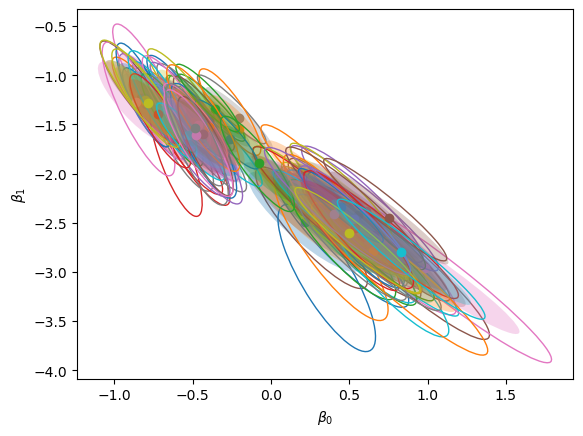

In [94]:
for i, r in enumerate(regions):
    p = plt.scatter(ths_eb[i,1], ths_eb[i,2])
    freqepid.confidence_ellipse(
        ths_eb[i,1:], covs_eb[i,1:,1:], n_std = chi_eb[i],
        facecolor=p.get_facecolor(), alpha=0.3)
    freqepid.confidence_ellipse(
        thats[i,1:], covs[i,1:,1:], n_std = chi_pa,
        edgecolor=p.get_facecolor(), facecolor='none', alpha=1)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); #plt.legend(loc=(1.02,0))

(-4.0, 0.0)

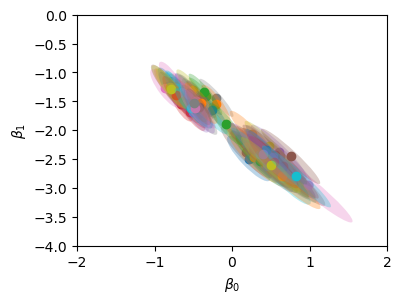

In [99]:
plt.figure(figsize=(4,3))
for i_region, (beta, th_eb, cov_eb) in enumerate(zip(betas, ths_eb, covs_eb)):
    p = plt.scatter(*(th_eb[1:]))
#     plt.arrow(*beta, *(th_eb[1:]-beta), width=0.005, 
#               length_includes_head=True,
#               color=p.get_facecolor(), alpha=1)
    freqepid.confidence_ellipse(
        th_eb[1:], cov_eb[1:,1:], n_std = chi_eb[i],
        facecolor=p.get_facecolor(), alpha=0.3)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$")
plt.xlim([-2, 2]); plt.ylim([-4, 0])

In [96]:
X2_eb = ((ths_eb[:,1:] - betas)[:,None,:] @ np.linalg.pinv(covs_eb[:,1:,1:]) @ (ths_eb[:,1:] - betas)[:,:,None])[:,0,0]

In [97]:
np.mean(X2_eb < chi_eb**2)

0.95

# 4. Causal Forecasting

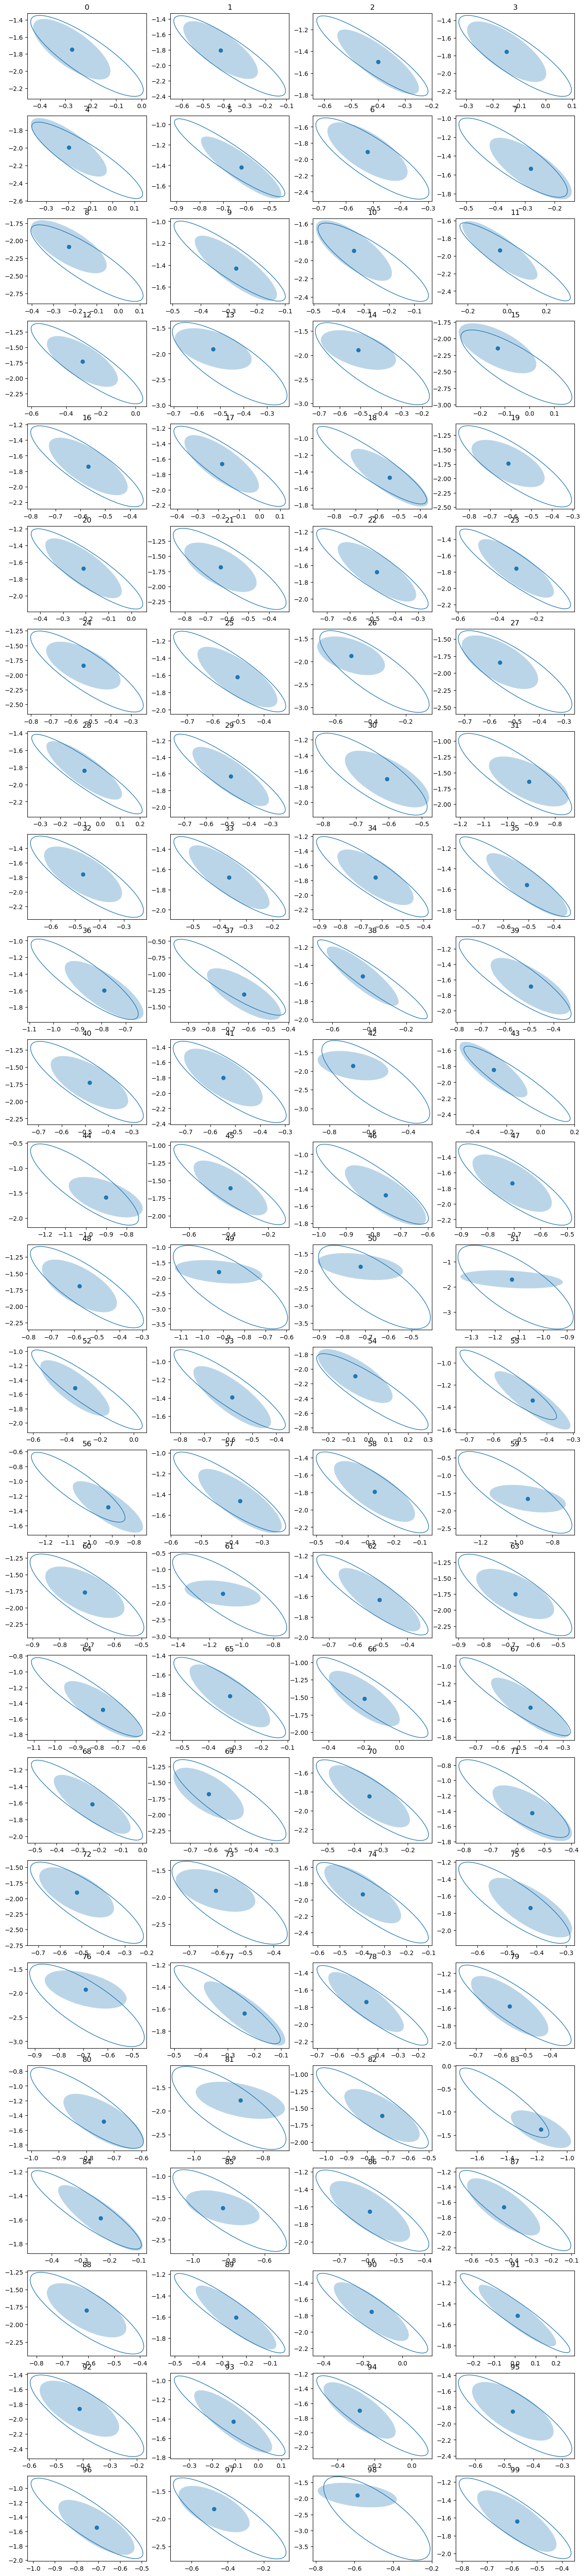

In [269]:
plt.figure(figsize=(16,int(num_region/4+1)*3))
for i, r in enumerate(regions):
    plt.subplot(int(num_region/4+1),4,i+1)
    
    p = plt.scatter(ths_eb[i,1], ths_eb[i,2])
    freqepid.confidence_ellipse(
        ths_eb[i,1:], covs_eb[i,1:,1:], n_std = chi_eb[i],
        facecolor=p.get_facecolor(), alpha=0.3)
    freqepid.confidence_ellipse(
        thats[i,1:], covs[i,1:,1:], n_std = chi_pa,
        edgecolor=p.get_facecolor(), facecolor='none', alpha=1)
    
    plt.title('%d'%i)

In [272]:
i = 22

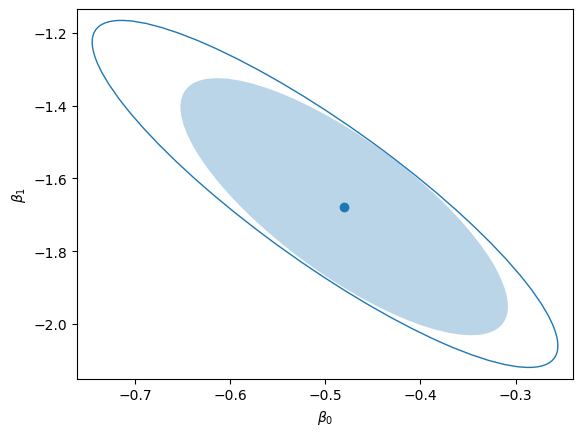

In [273]:
p = plt.scatter(ths_eb[i,1], ths_eb[i,2])
freqepid.confidence_ellipse(
    ths_eb[i,1:], covs_eb[i,1:,1:], n_std = chi_eb[i],
    facecolor=p.get_facecolor(), alpha=0.3)
freqepid.confidence_ellipse(
    thats[i,1:], covs[i,1:,1:], n_std = chi_pa,
    edgecolor=p.get_facecolor(), facecolor='none', alpha=1)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); #plt.legend(loc=(1.02,0))

In [274]:
data_i = data[data['region']==i]
T = len(data_i)
A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
Y = data_i["death"].to_numpy()

In [275]:
Tf = 30
Af = np.zeros([Tf, d])

In [276]:
Af[:,0] = np.full(Tf, 1)
Af[:,1] = np.full(Tf, 0.5)

In [277]:
Ae = np.concatenate([A, Af], 0)

## vanilla CR

In [278]:
conf_pa, _, _ = \
model.confidence_EY(Ae, thats[i,0], thats[i,1:],
                    covs[i], chi_pa, verbose=True)

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


optimization at t = 1 finished, lapse: 1.630sec.
optimization at t = 2 finished, lapse: 1.503sec.
optimization at t = 3 finished, lapse: 1.350sec.
optimization at t = 4 finished, lapse: 1.720sec.
optimization at t = 5 finished, lapse: 1.708sec.
optimization at t = 6 finished, lapse: 0.894sec.
optimization at t = 7 finished, lapse: 0.334sec.
optimization at t = 8 finished, lapse: 0.353sec.
optimization at t = 9 finished, lapse: 0.217sec.
optimization at t = 10 finished, lapse: 0.497sec.
optimization at t = 11 finished, lapse: 0.386sec.
optimization at t = 12 finished, lapse: 0.295sec.
optimization at t = 13 finished, lapse: 0.227sec.
optimization at t = 14 finished, lapse: 0.325sec.
optimization at t = 15 finished, lapse: 0.163sec.
optimization at t = 16 finished, lapse: 0.165sec.
optimization at t = 17 finished, lapse: 0.153sec.
optimization at t = 18 finished, lapse: 0.134sec.
optimization at t = 19 finished, lapse: 0.125sec.
optimization at t = 20 finished, lapse: 0.110sec.
optimizat

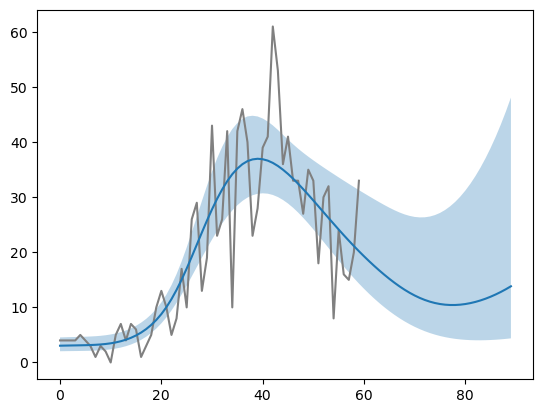

In [279]:
plt.plot(Y, color='grey')
plt.plot(model.predict_EY(Ae, thats[i,0], thats[i,1:]))
plt.fill_between(np.arange(T+Tf),
                 conf_pa[:,0], conf_pa[:,1], alpha=0.3)

## EBCR

In [280]:
conf_eb, _, _ = \
model.confidence_EY(Ae, ths_eb[i,0], ths_eb[i,1:],
                    covs_eb[i], chi_eb[i], verbose=True)

optimization at t = 1 finished, lapse: 0.797sec.
optimization at t = 2 finished, lapse: 0.408sec.
optimization at t = 3 finished, lapse: 0.902sec.
optimization at t = 4 finished, lapse: 0.446sec.
optimization at t = 5 finished, lapse: 0.758sec.
optimization at t = 6 finished, lapse: 0.253sec.
optimization at t = 7 finished, lapse: 0.158sec.
optimization at t = 8 finished, lapse: 0.203sec.
optimization at t = 9 finished, lapse: 0.260sec.
optimization at t = 10 finished, lapse: 0.198sec.
optimization at t = 11 finished, lapse: 0.187sec.
optimization at t = 12 finished, lapse: 0.106sec.
optimization at t = 13 finished, lapse: 0.168sec.
optimization at t = 14 finished, lapse: 0.149sec.
optimization at t = 15 finished, lapse: 0.173sec.
optimization at t = 16 finished, lapse: 0.210sec.
optimization at t = 17 finished, lapse: 0.129sec.
optimization at t = 18 finished, lapse: 0.097sec.
optimization at t = 19 finished, lapse: 0.088sec.
optimization at t = 20 finished, lapse: 0.132sec.
optimizat

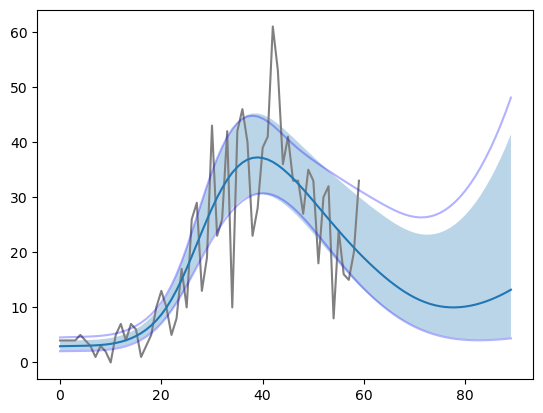

In [281]:
plt.plot(Y, color='grey')
plt.plot(model.predict_EY(Ae, ths_eb[i,0], ths_eb[i,1:]))
plt.fill_between(np.arange(T+Tf),
                 conf_eb[:,0], conf_eb[:,1], alpha=0.3)
plt.plot(conf_pa[:,0], color='blue', alpha=0.3)
plt.plot(conf_pa[:,1], color='blue', alpha=0.3)